In [1]:
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from matplotlib import pyplot
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Input, Flatten, Activation
from keras.layers import GlobalMaxPooling2D
from keras.layers.merge import Concatenate
from keras.models import Model
from keras import initializers
from keras.optimizers import Adam

Using TensorFlow backend.
C:\Users\lalit\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\lalit\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\lalit\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\lalit\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


def number_of_elements_in_a_directory_from_main_directory(path):
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~\nNumber Of Elements in Train and Test along with the Category:\n")
    
    path=[path+"/"+str(i)+"/" for i in os.listdir(path)] #this is used to get the 1st child level direcories in main directory
    inner_path = [] # inner path list
    
    for i in path:
        for j in os.listdir(i):
            inner_path .append(i+str(j)+"/")

    print("Different directories in Main:\n\n",inner_path,"\n\n")
    
    for i in inner_path:
        print(i, ":",end=" ")
        li = []
        for j in os.listdir(i):
            li.append(j)

        print(len(li))
        
    print("\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    

def category_info(path):
    print("Printing Categorical Information:\n")
    data_path = path # it has path value

    categories = os.listdir(data_path)#listing the directories or folders inside the file path
    label = [i for i in range(len(categories))] # Numerical labels in category
    category_dictionary = {} # for holding the mapping values from numeraical to category 
    dictionary={}# Mapping

    for i in range(len(label)):
        category_dictionary[i] = categories[i]
        dictionary[categories[i]] = i


    # Printing data inside variable
    print("Category: ",categories)
    print("Labels: ",label)
    print("Category Dictionary: ",category_dictionary)
    
    
    return category_dictionary,label
    
def glance_image(data_path,category,cls,num):

    
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n\n Glancing Image:")
    temp = os.listdir(data_path +'/'+ category[cls] )[num]# this gets the image name in directory    
    img_path = data_path +'/'+ category[cls]+'/'+ temp # image path within direcory
    image = plt.imread(img_path) #reads image
    plt.imshow(image) # shows or prints image
    plt.title(category[cls])
    plt.axis("off")
    plt.show()
    
    print("Shape of Image: ",image.shape)
    

def mean_dimension(num,cls,data_path,categories):
    
    dim1 = []
    dim2 = []
    path = data_path +'/'+ categories[cls]
    images_name = os.listdir(path)
    
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\nWorking on "+str(categories[cls])+" :")
    print('Calculating, Kindly Wait For Some Minutes.....')
    img=''

    for i in images_name[:num]:
        
        path_img = path + '/' + i 
        img = plt.imread(path_img)
        d1,d2 = img.shape[:2]
        dim1.append(d1)
        dim2.append(d2)

    
    sns.jointplot(dim1,dim2)
    plt.title("Img shape distribution on "+str(categories[cls]))
    plt.show()
        
    print("Img Max:",img.max())
    print("Img Min:",img.min())
    
    print("dim1 mean:",np.mean(dim1))
    print("dim2 mean:",np.mean(dim2))

    print("Last Image's shape:",img.shape)
    
    
    
    return dim1,dim2


In [3]:
path = input("Enter the main directory\n")
number_of_elements_in_a_directory_from_main_directory(path)

Enter the main directory
dataset
~~~~~~~~~~~~~~~~~~~~~~~~~~
Number Of Elements in Train and Test along with the Category:

Different directories in Main:

 ['dataset/test/Iceberg/', 'dataset/test/Ship/', 'dataset/train/Iceberg/', 'dataset/train/Ship/'] 


dataset/test/Iceberg/ : 160
dataset/test/Ship/ : 160
dataset/train/Iceberg/ : 593
dataset/train/Ship/ : 691

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [4]:
path = path+"/train"
category,label = category_info(path)

Printing Categorical Information:

Category:  ['Iceberg', 'Ship']
Labels:  [0, 1]
Category Dictionary:  {0: 'Iceberg', 1: 'Ship'}


~~~~~~~~~~~~~~~~~~~~~~~~~~~~

 Glancing Image:


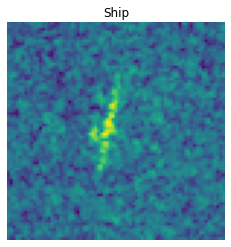

Shape of Image:  (75, 75)


In [5]:
glance_image(path,category,1,31)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~

 Glancing Image:


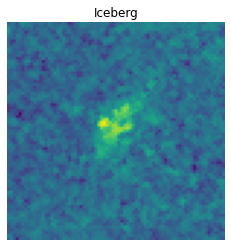

Shape of Image:  (75, 75)


In [6]:
glance_image(path,category,0,32)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Working on Iceberg :
Calculating, Kindly Wait For Some Minutes.....


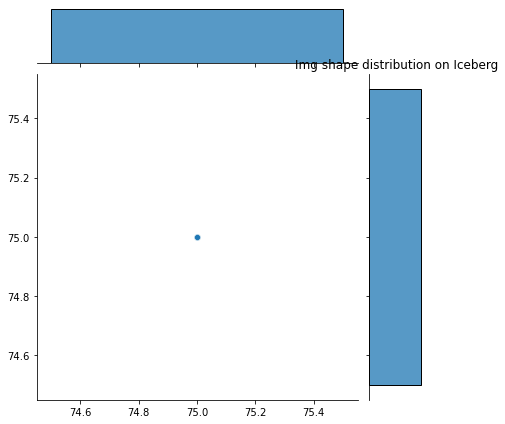

Img Max: 1.0
Img Min: 0.0
dim1 mean: 75.0
dim2 mean: 75.0
Last Image's shape: (75, 75)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Working on Ship :
Calculating, Kindly Wait For Some Minutes.....


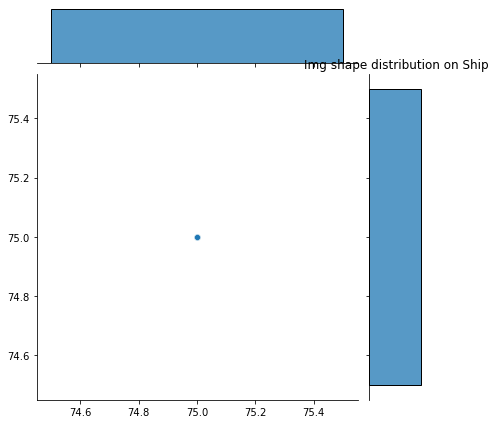

Img Max: 1.0
Img Min: 0.0
dim1 mean: 75.0
dim2 mean: 75.0
Last Image's shape: (75, 75)


In [7]:
dim1,dim2=mean_dimension(100,0,path,category)
dim1,dim2=mean_dimension(100,1,path,category)

In [3]:
model=Sequential()
model.add(Conv2D(64,(3, 3),activation='relu', input_shape=(75, 75, 3)))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(Dropout(0.2))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [4]:
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu' ))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))

In [5]:
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))


In [6]:
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))

In [7]:
model.add(Flatten())

In [8]:
model.add(Dense(init="uniform",activation="relu",output_dim=512))
model.add(Dropout(0.2))

C:\Users\lalit\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=512, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


In [9]:
model.add(Dense(init="uniform",activation="relu",output_dim=256))
model.add(Dropout(0.2))

C:\Users\lalit\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=256, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


In [10]:
model.add(Dense(init="uniform",activation="sigmoid",output_dim=1))

C:\Users\lalit\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


In [11]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [12]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
x_train = train_datagen.flow_from_directory(r'G:\Gayatri Files\Smartbridge\RSIP 2020\GEC INTERNSHIP\Ice Berg Detection\dataset\train',
                                                 target_size = (75, 75),
                                                 batch_size = 32,
                                                     class_mode = 'binary')
x_test = test_datagen.flow_from_directory(r'G:\Gayatri Files\Smartbridge\RSIP 2020\GEC INTERNSHIP\Ice Berg Detection\dataset\test',
                                            target_size = (75, 75),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 1284 images belonging to 2 classes.
Found 320 images belonging to 2 classes.


In [16]:
history=model.fit_generator(x_train,
                         steps_per_epoch = 250,
                         epochs = 10,
                         validation_data = x_test,
                         validation_steps = 63)

Epoch 1/10
250/250 [==============================] - 149s 595ms/step - loss: 0.5966 - acc: 0.6626 - val_loss: 0.4752 - val_acc: 0.7837
Epoch 2/10
250/250 [==============================] - 173s 694ms/step - loss: 0.4582 - acc: 0.7810 - val_loss: 0.4239 - val_acc: 0.8274
Epoch 3/10
250/250 [==============================] - 161s 644ms/step - loss: 0.3767 - acc: 0.8163 - val_loss: 0.3282 - val_acc: 0.8418
Epoch 4/10
250/250 [==============================] - 161s 646ms/step - loss: 0.3548 - acc: 0.8356 - val_loss: 0.3248 - val_acc: 0.8537
Epoch 5/10
250/250 [==============================] - 164s 656ms/step - loss: 0.3286 - acc: 0.8433 - val_loss: 0.3032 - val_acc: 0.8547
Epoch 6/10
250/250 [==============================] - 164s 656ms/step - loss: 0.3049 - acc: 0.8593 - val_loss: 0.2951 - val_acc: 0.8879
Epoch 7/10
250/250 [==============================] - 157s 627ms/step - loss: 0.2990 - acc: 0.8604 - val_loss: 0.2772 - val_acc: 0.8869
Epoch 8/10
250/250 [============================

In [17]:
model.save("iceberg.h5")